In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys')
from tools import plotting as myplt, envelope_analysis as ea

In [35]:
plot.rc['figure.facecolor'] = 'white'
plot.rc['axes.grid'] = False
plot.rc['grid.alpha'] = 0.04

# Distribution generation

Simple notebook to generate and plot the Danilov distribution in transverse phase space.

In [65]:
env = ea.Envelope(mode=1, eps=35.)
ax, ay = 0, 0
bx, by = 0.5, 0.5
u = 0.5
nu = 0.5 * np.pi
env.fit_twiss4D([ax, ay, bx, by, u, nu])

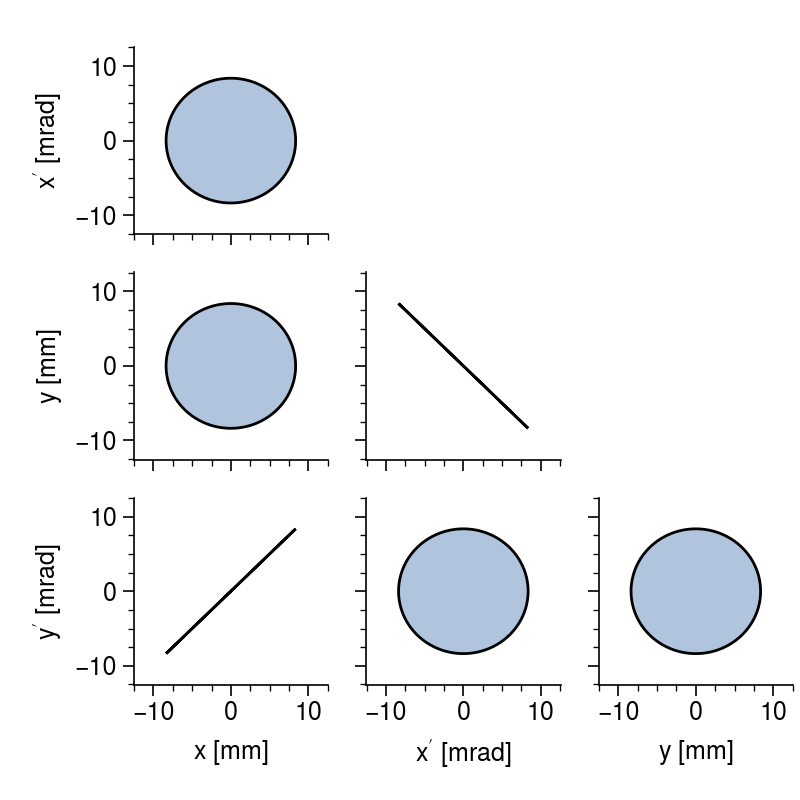

In [66]:
myplt.corner_env(env.params, figsize=4, fill=True);

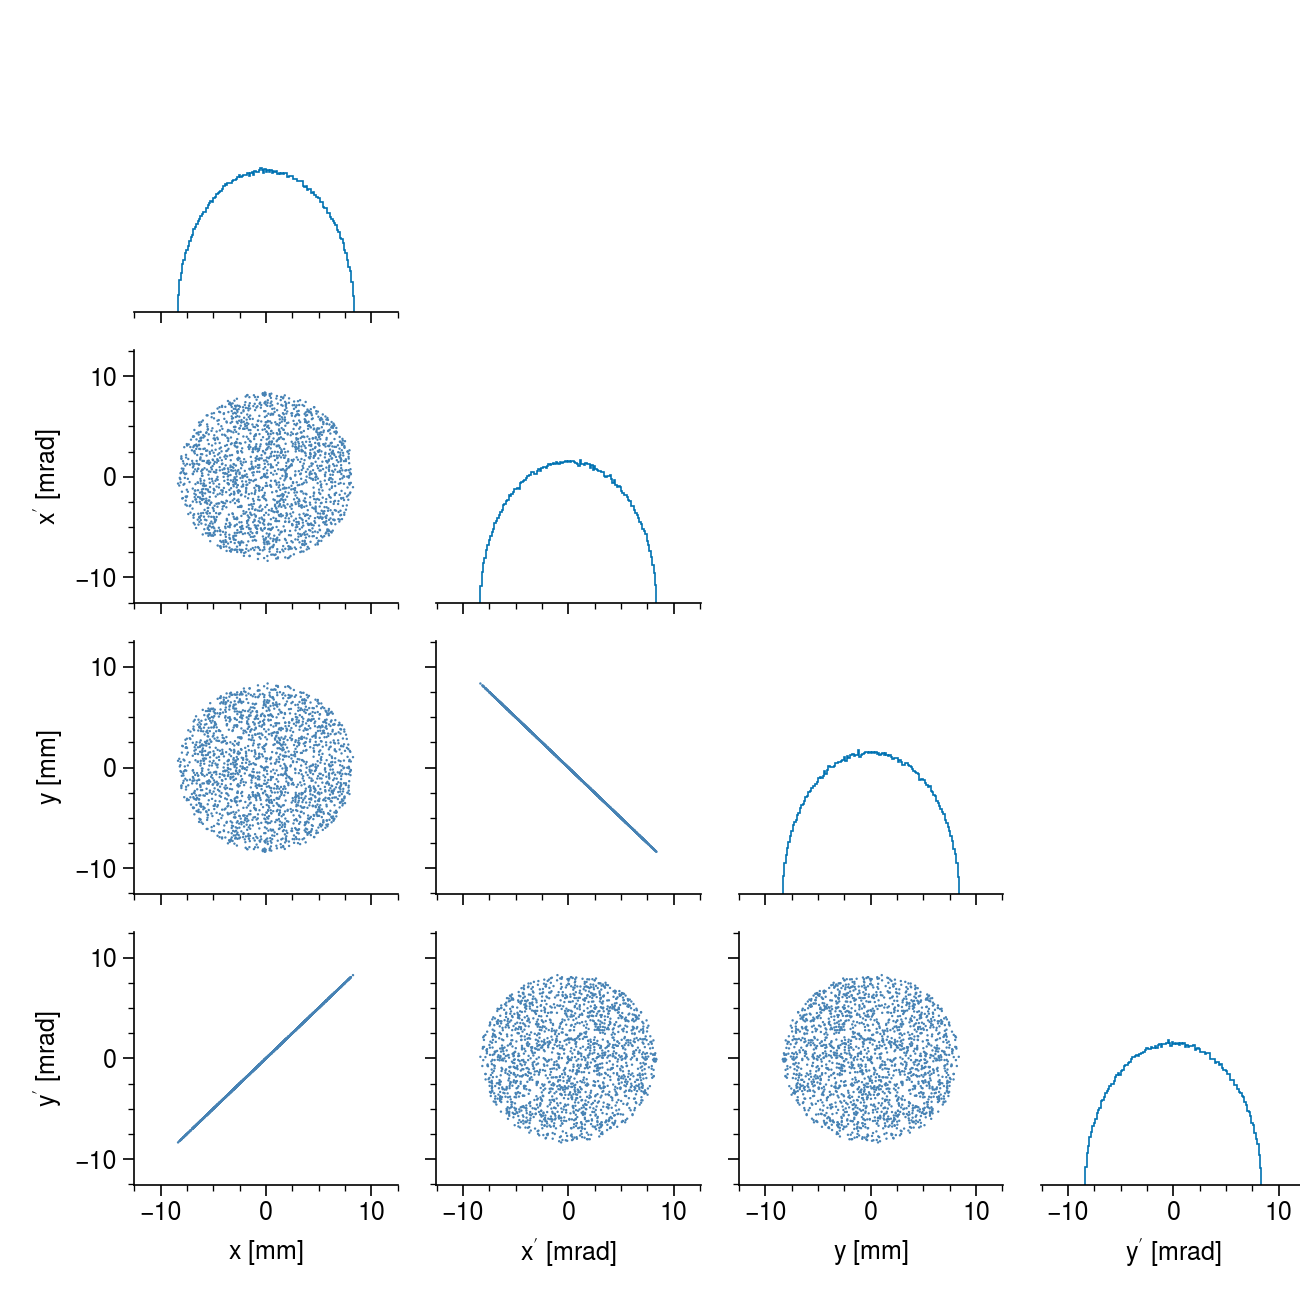

In [70]:
X = env.generate_dist(nparts=int(1e6))
axes = myplt.corner(X, samples=2000, figsize=6.5);
plt.savefig('danilov_dist.png', facecolor='white', dpi=500)